# 02_07_challenge_MDB.ipynb - Diffusion equation

#### Solve the 1D diffusion equation

$$
\frac{\partial\phi(x,t)}{\partial t} = \frac{\partial^2\phi(x,t)}{\partial x^2}
$$

#### Approximate

$$
\frac{\partial^2\phi(x,t)}{\partial x^2} \simeq \frac{\phi(x_{i-1},t) - 2\phi(x_i,t) + \phi(x_{i+1},t)}{(\Delta x)^2}
$$

#### Use a grid of size 128 with initial conditions

$$
\phi(x,0) = \sin(4\pi x) + \sin(9\pi x), \phi(0,t) = \phi(1,t) = 0
$$

#### Use first-order field evolution with $\Delta t < (\Delta x)^2 /2$

$$
\phi(x,t+\Delta t) = \phi(x,t) + \Delta t\frac{\partial^2\phi(x,t)}{\partial x^2}
$$

In [1]:
import math

import numpy as np
import matplotlib.pyplot as pp

In [2]:
n = 128

In [3]:
dx = 1/n

In [4]:
xs = np.linspace(0.5*dx, 1-0.5*dx, n)

In [5]:
def initfield():
    array = np.sin(4 * math.pi * xs) + np.sin(9 * math.pi * xs)
    array[0] = array[-1] = 0
    
    return array

In [6]:
field = initfield()

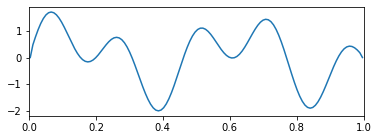

In [7]:
pp.figure(figsize=(6,2))
pp.plot(xs, field)
pp.axis(xmin=0,xmax=1);

In [16]:
import numba

In [18]:
field.shape[0]

128

In [27]:
@numba.jit

def evolution_numba(array, delta_x, delta_t, generations):    
    updated = array.copy()
    updated[0] = updated[-1] = 0

    for i in range(1, generations + 1):
        for j in range(1, array.shape[0]-1):
            updated[j] = updated[j] + delta_t * (updated[j-1] - 2 * updated[j] + updated[j+1]) / delta_x / delta_x
            
    return updated

In [28]:
dt = dx*dx/2/2

In [40]:
gen2000 = evolution_numba(field, dx, dt, 2000)

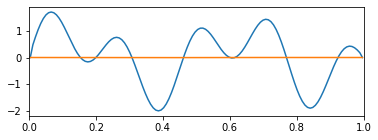

In [42]:
pp.figure(figsize=(6,2))
pp.plot(xs, field)
pp.plot(xs, gen2000)
pp.axis(xmin=0,xmax=1);

In [44]:
import numpy

In [45]:
numpy.linspace(0, 10, 5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])